In [1]:
import numpy as np

In [2]:
class DummyRNN():
    def __init__(self, input_features, output_features):
        self.W = np.random.random((output_features, input_features))
        self.U = np.random.random((output_features, output_features))
        self.b = np.random.random((output_features))
        self.state = np.zeros(output_features)

    def forward(self, input_data, concatenate):
        memory = []
        for input_t in input_data:
            output_t = np.tanh(self.W @ input_t + self.U @ self.state + self.b)
            memory.append(output_t)
            self.state = output_t
        if concatenate:
            result = np.concatenate(memory, axis=0)
        else:
            result = memory
        return result

In [3]:
time_steps = 100
input_features = 32
output_features = 64

model = DummyRNN(input_features, output_features)
dummy_input = np.random.random((time_steps, input_features))
len(model.forward(dummy_input, concatenate=True))

6400

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

2024-03-10 13:34:53.318899: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 13:34:53.393550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 13:34:53.626244: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 13:34:53.626815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 13:34:54.537536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [5]:
def load_data(max_len, max_features):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
    X_train = preprocessing.sequence.pad_sequences(X_train, max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, max_len)
    return X_train, y_train, X_test, y_test

In [6]:
max_len = 100
vocab_size = 1000
X_train, y_train, X_test, y_test = load_data(max_len=max_len, max_features=vocab_size)

In [7]:
def feed_forward(vocab_size, output_dim, input_length):
    main_input = Input(shape=(input_length), dtype='int32')
    x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
    x = Flatten()(x)
    output = Dense(1, activation=tf.nn.sigmoid)(x)
    model = Model(main_input, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
model_1 = feed_forward(vocab_size, 16, max_len)

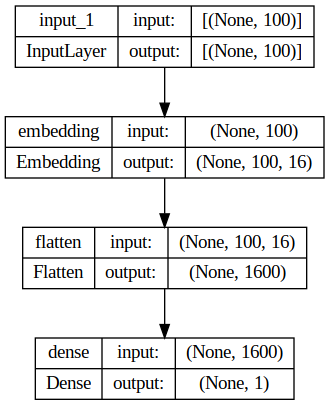

In [9]:
plot_model(model_1, show_shapes=True, show_layer_names=True)

In [12]:
def simple_rnn(vocab_size, output_dim, input_length):
    main_input = Input(shape=(input_length), dtype='int32')
    x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
    x = SimpleRNN(32, return_sequences=True)(x)
    x = SimpleRNN(32)(x)
    output = Dense(1, activation=tf.nn.sigmoid)(x)
    model = Model(main_input, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
    

In [13]:
model_2 = simple_rnn(vocab_size, 16, max_len)

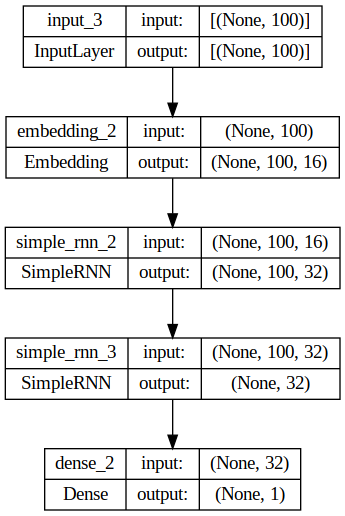

In [14]:
plot_model(model_2, show_shapes=True, show_layer_names=True)

In [15]:
# LSTM model
def simple_lstm(vocab_size, output_dim, input_length):
    main_input = Input(shape=(input_length), dtype='int32')
    x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
    x = LSTM(32)(x)
    x = Dense(32, activation=tf.nn.relu)(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation=tf.nn.sigmoid)(x)
    model = Model(main_input, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [16]:
model_3 = simple_lstm(vocab_size, 16, max_len)

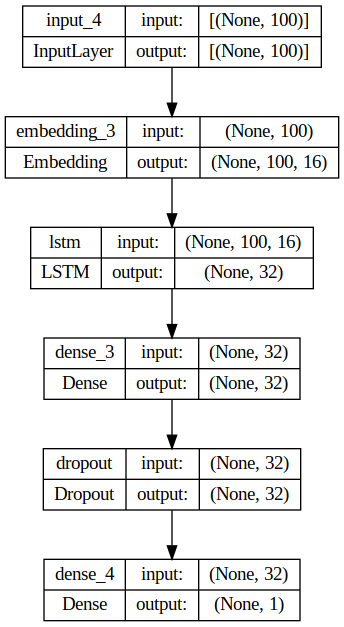

In [17]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

In [18]:
def simple_cnn(vocab_size, output_dim, input_length):
  main_input = Input(shape=(input_length), dtype='int32')
  x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
  x = Conv1D(32, 7, activation=tf.nn.relu)(x)
  x = MaxPooling1D(5)(x)
  x = Conv1D(32, 7, activation=tf.nn.relu)(x)
  x = GlobalMaxPool1D()(x)
  output = Dense(1)(x)
  model = Model(main_input, output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [19]:
model_4 = simple_cnn(vocab_size, 16, max_len)

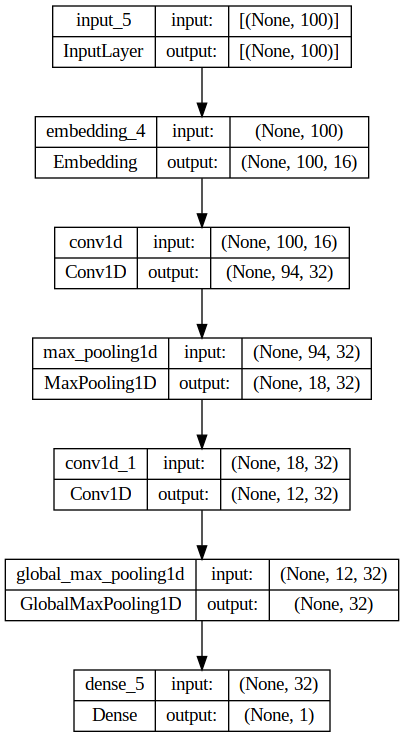

In [20]:
plot_model(model_4, show_shapes=True, show_layer_names=True)

In [21]:
history_1 = model_1.fit(X_train, 
                        y_train, 
                        batch_size=32, 
                        epochs=10, 
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5835 - accuracy: 0.6912 - val_loss: 0.4293 - val_accuracy: 0.8042
Epoch 2/10
625/625 [==============================] - 1s 861us/step - loss: 0.3819 - accuracy: 0.8332 - val_loss: 0.3861 - val_accuracy: 0.8216
Epoch 3/10
625/625 [==============================] - 1s 825us/step - loss: 0.3395 - accuracy: 0.8529 - val_loss: 0.3880 - val_accuracy: 0.8214
Epoch 4/10
625/625 [==============================] - 1s 842us/step - loss: 0.3122 - accuracy: 0.8681 - val_loss: 0.3868 - val_accuracy: 0.8184
Epoch 5/10
625/625 [==============================] - 1s 840us/step - loss: 0.2840 - accuracy: 0.8836 - val_loss: 0.3970 - val_accuracy: 0.8162
Epoch 6/10
625/625 [==============================] - 1s 840us/step - loss: 0.2574 - accuracy: 0.8978 - val_loss: 0.4079 - val_accuracy: 0.8168
Epoch 7/10
625/625 [==============================] - 1s 861us/step - loss: 0.2313 - accuracy: 0.9146 - val_loss: 0.4312 - val_accuracy: 0

In [22]:
history_2 = model_2.fit(X_train, 
                        y_train, 
                        batch_size=32, 
                        epochs=10, 
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 15ms/step - loss: 0.6607 - accuracy: 0.5749 - val_loss: 0.6147 - val_accuracy: 0.6468
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4851 - accuracy: 0.7701 - val_loss: 0.4777 - val_accuracy: 0.7822
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4148 - accuracy: 0.8158 - val_loss: 0.4817 - val_accuracy: 0.7748
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3806 - accuracy: 0.8341 - val_loss: 0.4598 - val_accuracy: 0.7916
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3461 - accuracy: 0.8540 - val_loss: 0.4936 - val_accuracy: 0.7756
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3181 - accuracy: 0.8651 - val_loss: 0.5198 - val_accuracy: 0.7726
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2787 - accuracy: 0.8874 - val_loss: 0.5471 - val_accuracy: 0.7

In [24]:
history_3 = model_3.fit(X_train, 
                        y_train, 
                        batch_size=32, 
                        epochs=10, 
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 9s 12ms/step - loss: 0.4900 - accuracy: 0.7518 - val_loss: 0.4088 - val_accuracy: 0.8130
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3866 - accuracy: 0.8309 - val_loss: 0.4010 - val_accuracy: 0.8190
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3713 - accuracy: 0.8368 - val_loss: 0.4146 - val_accuracy: 0.8180
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3605 - accuracy: 0.8412 - val_loss: 0.4129 - val_accuracy: 0.8102
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3459 - accuracy: 0.8487 - val_loss: 0.4096 - val_accuracy: 0.8114
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3361 - accuracy: 0.8535 - val_loss: 0.3823 - val_accuracy: 0.8270
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3229 - accuracy: 0.8569 - val_loss: 0.3841 - val_accuracy: 0.8208

In [25]:
history_4 = model_4.fit(X_train, 
                        y_train, 
                        batch_size=32, 
                        epochs=10, 
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6119 - accuracy: 0.6841 - val_loss: 0.5026 - val_accuracy: 0.7714
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7709 - val_loss: 0.4943 - val_accuracy: 0.7786
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7934 - val_loss: 0.4927 - val_accuracy: 0.7774
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.8066 - val_loss: 0.5029 - val_accuracy: 0.7810
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 2.4701 - accuracy: 0.7293 - val_loss: 7.7192 - val_accuracy: 0.4938
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 7.5976 - accuracy: 0.5016 - val_loss: 7.7192 - val_accuracy: 0.4938
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 7.3289 - accuracy: 0.5099 - val_loss: 1.2272 - val_accuracy: 0.7354
Epoch 

In [26]:
model_1.evaluate(X_test, y_test)

782/782 [==============================] - 0s 543us/step - loss: 0.4802 - accuracy: 0.8013


[0.4801936745643616, 0.8013200163841248]

In [27]:
model_2.evaluate(X_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.7164 - accuracy: 0.6410


[0.7164299488067627, 0.6409599781036377]

In [28]:
model_3.evaluate(X_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.3825 - accuracy: 0.8321


[0.3825034499168396, 0.8320800065994263]

In [29]:
model_4.evaluate(X_test, y_test)

782/782 [==============================] - 1s 976us/step - loss: 0.5930 - accuracy: 0.7930


[0.5929779410362244, 0.7929999828338623]

In [33]:
def show_learning_curve(history):
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'])
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Cross Entropy Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'])
  plt.tight_layout()
  plt.show()

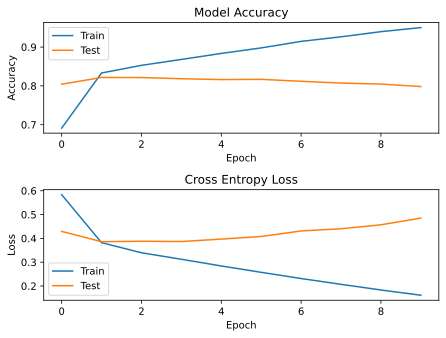

In [34]:
show_learning_curve(history_1)

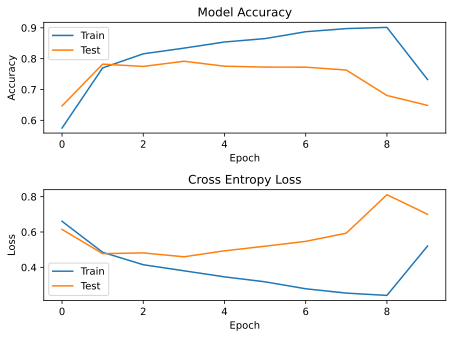

In [35]:
show_learning_curve(history_2)

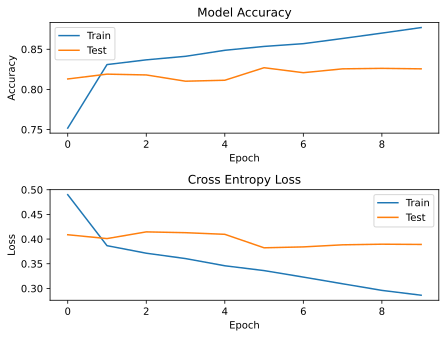

In [36]:
show_learning_curve(history_3)

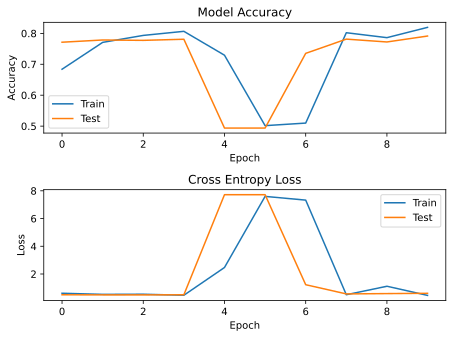

In [37]:
show_learning_curve(history_4)